In [8]:
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder,OneHotEncoder
from sklearn import metrics
import pandas as pd
from sklearn import svm
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import recall_score
from sklearn.metrics import roc_auc_score
from sklearn.metrics import precision_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier

In [9]:
#importing data
df = pd.read_csv("chronic_kidney_disease.csv")

In [10]:
df.head()

,age,bp,sg,al,su,rbc,pc,pcc,ba,bgr,...,pcv,wbcc,rbcc,htn,dm,cad,appet,pe,ane,class
0,48,80,1.02,1,0,0,0,1,1,121,...,44,7800,5.2,0,0,1,1,1,1,ckd
1,7,50,1.02,4,0,0,0,1,1,?,...,38,6000,0.0,1,1,1,1,1,1,ckd
2,62,80,1.01,2,3,0,0,1,1,423,...,31,7500,0.0,1,0,1,0,1,0,ckd
3,48,70,1.005,4,0,0,1,0,1,117,...,32,6700,3.9,0,1,1,0,0,0,ckd
4,51,80,1.01,2,0,0,0,1,1,106,...,35,7300,4.6,1,1,1,1,1,1,ckd


In [11]:
df = df.replace('?', None)
df = df.drop(["sod", "pot","hemo"], axis = 1) # dropping these values because there are too many missing values

In [12]:
# coverting class lebal into dummy coding
df["class"] = df["class"].astype('category')
df["class"] = df["class"].cat.codes

In [13]:
x = df.iloc[:,:21]
y = df.iloc[:,-1]

#Splitting the data into 80% Training and 20% Testing sets
Xtrain, Xtest, ytrain, ytest = train_test_split(df,y, test_size=0.2)

print(Xtrain.shape)
print(Xtest.shape)
print(ytrain.shape)
print(ytest.shape)

(320, 22)
(80, 22)
(320,)
(80,)


# SVM Models

              precision    recall  f1-score   support

           0       1.00      0.93      0.97        46
           1       0.92      1.00      0.96        34

    accuracy                           0.96        80
   macro avg       0.96      0.97      0.96        80
weighted avg       0.97      0.96      0.96        80

[[43  3]
 [ 0 34]]


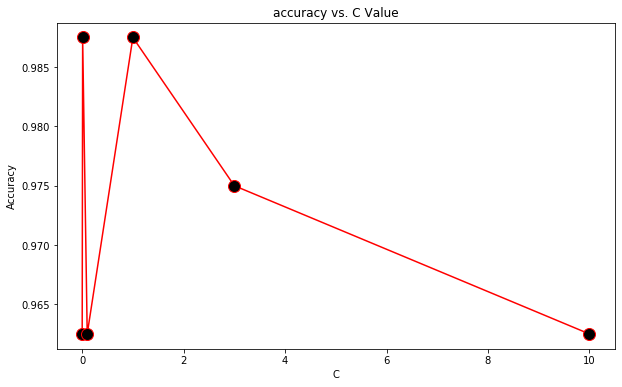

In [14]:
# Fit an SVM using linear kernel
C = [0.001,0.01,0.1,1,3,10]
degree = list(range(1,32,2))
gamma = [10,50,100,500,1000]

svm_accuracy_score = []    

for i in C:
    svm_model = svm.SVC(kernel='linear',C=i)
    svm_model.fit(Xtrain, ytrain)

    #Training/Testing Accuracy:
    svm_acc = metrics.accuracy_score(ytest, svm_model.predict(Xtest))
    svm_accuracy_score.append(svm_acc)

plt.figure(figsize=(10,6))
plt.plot(C,svm_accuracy_score,color = 'red',linestyle='-', marker='o',markerfacecolor='black', markersize=12)
plt.title('accuracy vs. C Value')
plt.xlabel('C')
plt.ylabel('Accuracy')

    #Training/Testing Accuracy:
svm_acc = metrics.accuracy_score(ytest, svm_model.predict(Xtest))
   
print(classification_report(ytest, svm_model.predict(Xtest)))
print(confusion_matrix(ytest, svm_model.predict(Xtest)))

              precision    recall  f1-score   support

           0       0.57      1.00      0.73        46
           1       0.00      0.00      0.00        34

    accuracy                           0.57        80
   macro avg       0.29      0.50      0.37        80
weighted avg       0.33      0.57      0.42        80

[[46  0]
 [34  0]]


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


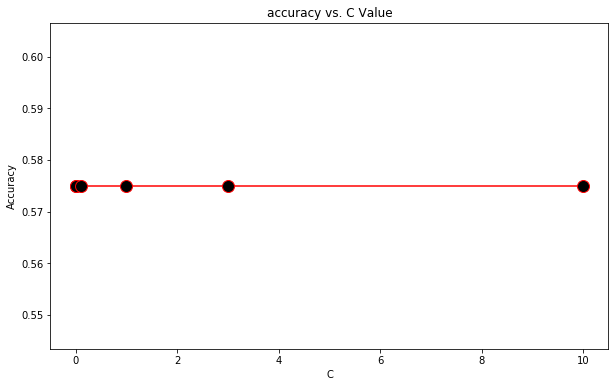

In [15]:
# Fit an SVM using polynomial kernel
C = [0.001,0.01,0.1,1,3,10]
degree = list(range(1,32,2))
gamma = [10,50,100,500,1000]

svm_accuracy_score = []    

for i in C:
    svm_model = svm.SVC(kernel='poly',C=i)
    svm_model.fit(Xtrain, ytrain)

    #Training/Testing Accuracy:
    svm_acc = metrics.accuracy_score(ytest, svm_model.predict(Xtest))
    svm_accuracy_score.append(svm_acc)

plt.figure(figsize=(10,6))
plt.plot(C,svm_accuracy_score,color = 'red',linestyle='-', marker='o',markerfacecolor='black', markersize=12)
plt.title('accuracy vs. C Value')
plt.xlabel('C')
plt.ylabel('Accuracy')

    #Training/Testing Accuracy:
svm_acc = metrics.accuracy_score(ytest, svm_model.predict(Xtest))
   
print(classification_report(ytest, svm_model.predict(Xtest)))
print(confusion_matrix(ytest, svm_model.predict(Xtest)))

              precision    recall  f1-score   support

           0       0.57      1.00      0.73        46
           1       0.00      0.00      0.00        34

    accuracy                           0.57        80
   macro avg       0.29      0.50      0.37        80
weighted avg       0.33      0.57      0.42        80

[[46  0]
 [34  0]]


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


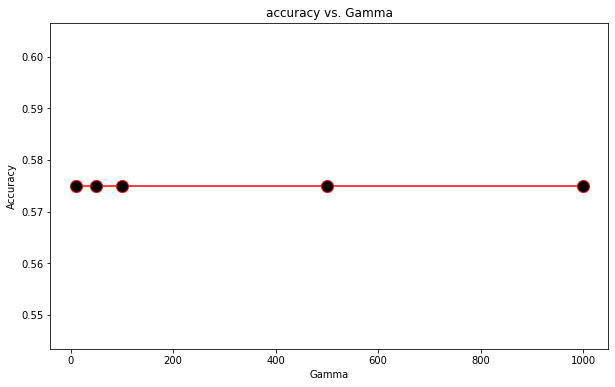

In [16]:
gamma_accuracy_score = []
for i in gamma:
    
    
    svc_model = svm.SVC(kernel='rbf', gamma = i)

    svc_model.fit(Xtrain,ytrain)
    svm_acc3 = metrics.accuracy_score(ytest, svc_model.predict(Xtest))
    gamma_accuracy_score.append(svm_acc3)
        
plt.figure(figsize=(10,6))
plt.plot(gamma,gamma_accuracy_score,color = 'red',linestyle='-', marker='o',markerfacecolor='black', markersize=12)
plt.title('accuracy vs. Gamma')
plt.xlabel('Gamma')
plt.ylabel('Accuracy')

svc_model = svm.SVC(kernel='rbf', gamma= 10)

svc_model.fit(Xtrain,ytrain)
#x = metrics.accuracy_score(ytest, svc_model.predict(Xtest))
   
print(classification_report(ytest, svc_model.predict(Xtest)))
print(confusion_matrix(ytest, svc_model.predict(Xtest)))

# KNN

              precision    recall  f1-score   support

           0       0.82      0.80      0.81        46
           1       0.74      0.76      0.75        34

    accuracy                           0.79        80
   macro avg       0.78      0.78      0.78        80
weighted avg       0.79      0.79      0.79        80

[[37  9]
 [ 8 26]]


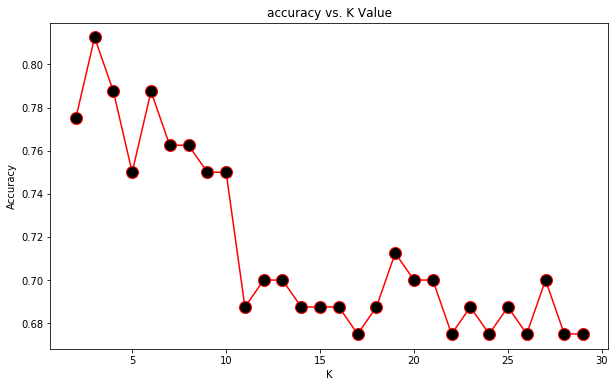

In [17]:
# Build a KNN using 5 neighbor nodes
k = list(range(2,30))
accuracy_score = []
for i in k:
    knn_model = KNeighborsClassifier(n_neighbors=i)

    #Fit the model using our training data
    knn_model.fit(Xtrain, ytrain)

    # Training Accuracy:
    knn_acc = metrics.accuracy_score(ytrain, knn_model.predict(Xtrain))
    knn_acc_test = metrics.accuracy_score(ytest, knn_model.predict(Xtest))
    accuracy_score.append(knn_acc_test)
    

plt.figure(figsize=(10,6))
plt.plot(range(2,30),accuracy_score,color = 'red',linestyle='-', marker='o',markerfacecolor='black', markersize=12)
plt.title('accuracy vs. K Value')
plt.xlabel('K')
plt.ylabel('Accuracy')

knn_model = KNeighborsClassifier(n_neighbors=6)

#Fit the model using our training data
knn_model.fit(Xtrain, ytrain)
knn_model.fit(Xtrain, ytrain)
print(classification_report(ytest,knn_model.predict(Xtest)))
print(confusion_matrix(ytest,knn_model.predict(Xtest)))

# Decision Trees

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        46
           1       1.00      1.00      1.00        34

    accuracy                           1.00        80
   macro avg       1.00      1.00      1.00        80
weighted avg       1.00      1.00      1.00        80

[[46  0]
 [ 0 34]]


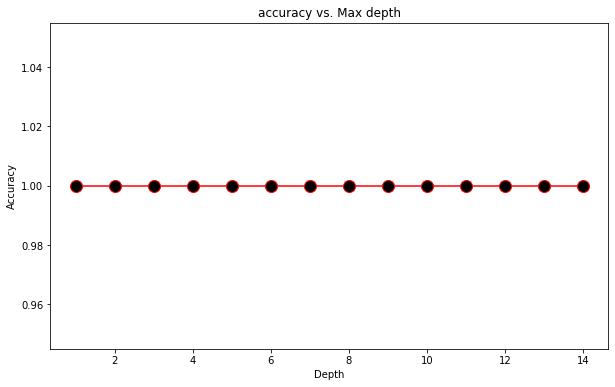

In [18]:
decision_accuracy = []
max_depth_range = list(range(1,15))

for i in max_depth_range:
    treeclf = DecisionTreeClassifier(max_depth=i,criterion = 'gini')

    # Fit our training data
    treeclf.fit(Xtrain, ytrain)
    decision_acc_test = metrics.accuracy_score(ytest, treeclf.predict(Xtest))
    decision_accuracy.append(decision_acc_test)

plt.figure(figsize=(10,6))
plt.plot(max_depth_range,decision_accuracy,color = 'red',linestyle='-', marker='o',markerfacecolor='black', markersize=12)
plt.title('accuracy vs. Max depth')
plt.xlabel('Depth')
plt.ylabel('Accuracy')

treeclf = DecisionTreeClassifier(max_depth=2,criterion = 'gini')

    # Fit our training data
treeclf.fit(Xtrain, ytrain)
print(classification_report(ytest, treeclf.predict(Xtest)))
print(confusion_matrix(ytest, treeclf.predict(Xtest)))